## Tensorflow Keras pretraining model


- VGG16
- VGG19
- ResNet50
- Inception v3
- Xception


### VGG16

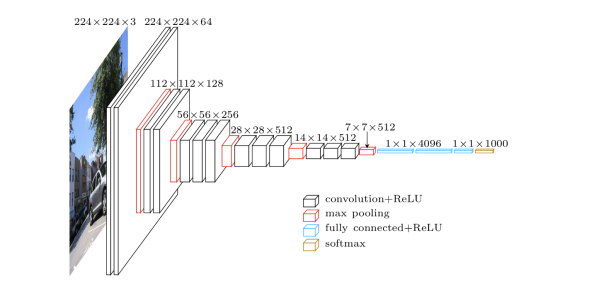

### VGG19

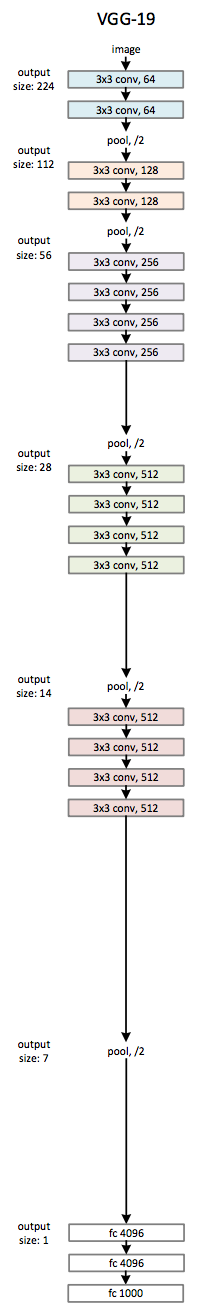

### Import model from keras.applications

In [1]:
# check the version of tensorflow
import tensorflow
tensorflow.__version__

'2.7.0'

In [2]:
# import OpenCV2
import cv2 

In [3]:
# import VGG16
from tensorflow.keras.applications import VGG16
import os

In [4]:
# VGG16 include top layer and use weights from keras imagenet
# show VGG16 structure
vgg16 = VGG16(include_top=True, weights='imagenet')
vgg16.summary()

553476096/553467096 [==============================] - 11s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

### Predict by pretraining model

In [5]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/CV project/1.cv1-Image classification models by tensorflow+keras"

os.chdir(path)
os.listdir(path)

Mounted at /content/drive


['1.2.kaggle_dog_breed_classification_competition.ipynb',
 'tensorflow_serving介绍.pdf',
 '.DS_Store',
 '.ipynb_checkpoints',
 'img',
 'dog-breed-identification',
 '2.kaggle_dog_breed_classification_competition.ipynb',
 '3.Tensorflow_modelling_and_serving.ipynb',
 '1.3.Tensorflow_modelling_and_serving.ipynb',
 '1.Deep_Convolutional_Neural_Networks.ipynb',
 'model.png',
 '1.1Deep_Convolutional_Neural_Networks.ipynb']

In [6]:
# image path
IMAGENET_FOLDER = '.img/imagenet'  #in the repo

In [7]:
# show image
!ls img/imagenet

apricot_565.jpeg  apricot_787.jpeg	strawberry_1174.jpeg
apricot_696.jpeg  strawberry_1157.jpeg	strawberry_1189.jpeg


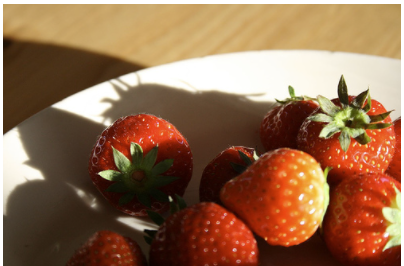

In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

img_path = "/content/drive/MyDrive/Colab Notebooks/CV project/1.cv1-Image classification models by tensorflow+keras/img/imagenet/strawberry_1157.jpeg"
img = image.load_img(img_path, target_size=(224, 224))  # load image, vgg input image size 224*224
x = image.img_to_array(img)   # change image to array
x = np.expand_dims(x, axis=0)   # change image dims to 1*224*224*3
x = preprocess_input(x) # process array by preprocess_input
print('Input image shape:', x.shape)

preds = vgg16.predict(x)  # predict image array
print('Predicted:', decode_predictions(preds))  # predict result by decode_predictions

Input image shape: (1, 224, 224, 3)
49152/35363 [=========================================] - 0s 0us/step
Predicted: [[('n07745940', 'strawberry', 0.9857027), ('n07836838', 'chocolate_sauce', 0.005128062), ('n04332243', 'strainer', 0.003665665), ('n07614500', 'ice_cream', 0.0021994396), ('n04476259', 'tray', 0.0011691345)]]


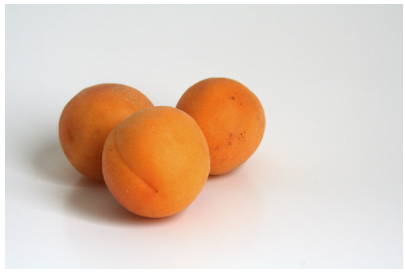

In [9]:
img_path = "/content/drive/MyDrive/Colab Notebooks/CV project/1.cv1-Image classification models by tensorflow+keras/img/imagenet/apricot_696.jpeg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n07747607', 'orange', 0.84150314), ('n07749582', 'lemon', 0.05384698), ('n07717556', 'butternut_squash', 0.017796773), ('n03937543', 'pill_bottle', 0.015318956), ('n07720875', 'bell_pepper', 0.008361497)]]


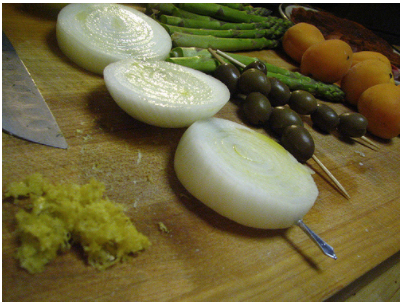

In [10]:
img_path = "/content/drive/MyDrive/Colab Notebooks/CV project/1.cv1-Image classification models by tensorflow+keras/img/imagenet/apricot_565.jpeg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n07718472', 'cucumber', 0.37633246), ('n07716358', 'zucchini', 0.25885555), ('n07711569', 'mashed_potato', 0.049367182), ('n07716906', 'spaghetti_squash', 0.033635523), ('n12144580', 'corn', 0.031457294)]]


# Residual Networks


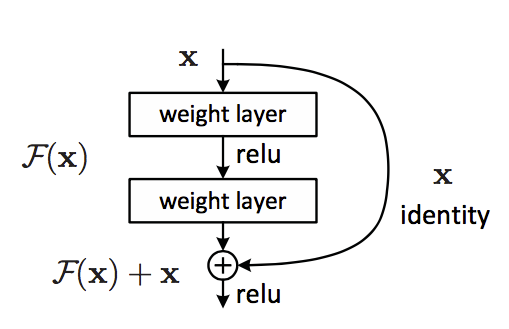

## ResNet 50


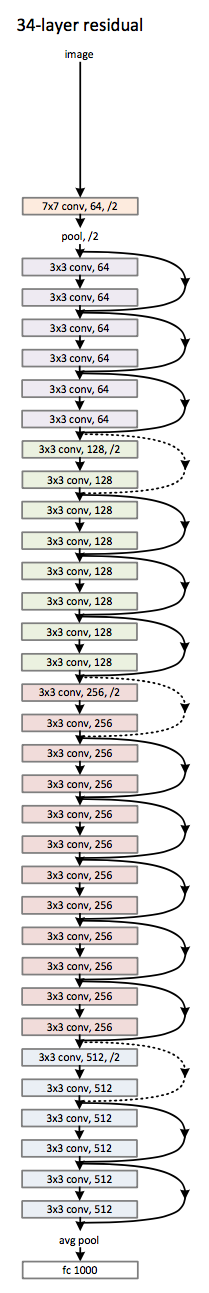

In [11]:
# import ResNet50
from tensorflow.keras.applications import ResNet50

In [12]:
# show ResNet50 structure
ResNet50().summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [13]:
# plot ResNet50 structure
from tensorflow.keras.utils import plot_model
plot_model(ResNet50(), show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

---

### Visualize CNN's convolution kernel


In [14]:
import numpy as np
import time
from tensorflow.keras.applications import vgg16
from tensorflow.keras import backend as K   # extract image features

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
# image size
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [17]:
from tensorflow.keras.applications import vgg16

# load VGG16 weight from imagenet without softmax
vgg16 = vgg16.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

58900480/58889256 [==============================] - 1s 0us/step
Model loaded.


In [18]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [19]:
from collections import OrderedDict   # import order dict
layer_dict = OrderedDict()
# store model layers and specific layer of correspondence
for layer in vgg16.layers[1:]:
    layer_dict[layer.name] = layer

In [20]:
layer_dict

OrderedDict([('block1_conv1',
              <keras.layers.convolutional.Conv2D at 0x7f22dc7c3290>),
             ('block1_conv2',
              <keras.layers.convolutional.Conv2D at 0x7f2349c83e50>),
             ('block1_pool',
              <keras.layers.pooling.MaxPooling2D at 0x7f2349e761d0>),
             ('block2_conv1',
              <keras.layers.convolutional.Conv2D at 0x7f22dc7c32d0>),
             ('block2_conv2',
              <keras.layers.convolutional.Conv2D at 0x7f2349d6d590>),
             ('block2_pool',
              <keras.layers.pooling.MaxPooling2D at 0x7f22dc7bc290>),
             ('block3_conv1',
              <keras.layers.convolutional.Conv2D at 0x7f2349d08950>),
             ('block3_conv2',
              <keras.layers.convolutional.Conv2D at 0x7f23d02cb3d0>),
             ('block3_conv3',
              <keras.layers.convolutional.Conv2D at 0x7f22dc7b0410>),
             ('block3_pool',
              <keras.layers.pooling.MaxPooling2D at 0x7f23d0163290>),
   

### Test picture

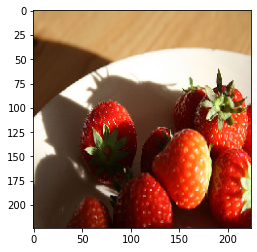

In [21]:
img_path = "/content/drive/MyDrive/Colab Notebooks/CV project/1.cv1-Image classification models by tensorflow+keras/img/imagenet/strawberry_1157.jpeg"
img = image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


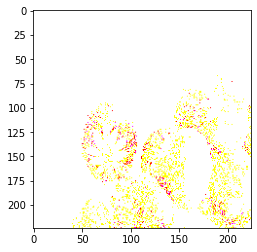

In [22]:
input_img_data = image.img_to_array(img)
#input_img_data /= 255
plt.imshow(input_img_data)

In [23]:
input_img_data = np.expand_dims(input_img_data, axis=0)
print('Input image shape:', input_img_data.shape)

Input image shape: (1, 224, 224, 3)


### Extract intermediate layers for visualization


In [24]:
import tensorflow as tf
## define get_activations function to extract intermediate layers for result
def get_activations(model, layer, input_img_data):
    activations_f = K.function([model.layers[0].input], [layer.output,])
    activations = activations_f((input_img_data))
    return activations

In [25]:
layer_name = 'block1_conv2'   # use block 1 conv layer 2
layer = layer_dict[layer_name]
activations = get_activations(vgg16, layer, input_img_data)

In [26]:
print(len(activations))
activation = activations[0]
activation.shape

1


(1, 224, 224, 64)

In [27]:
layer.filters  # conv kernel

64

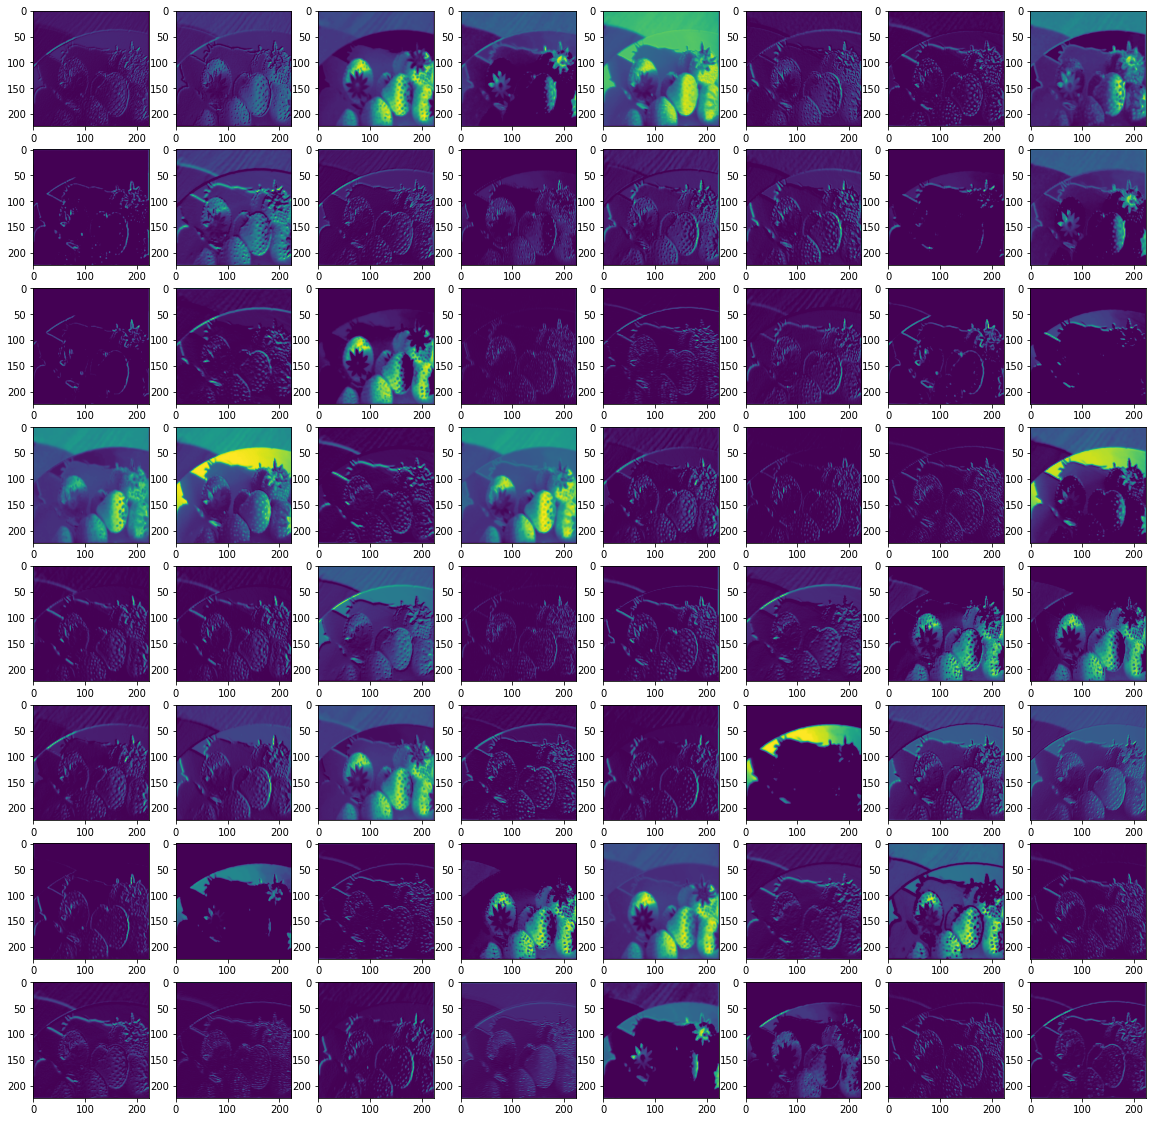

In [28]:
activated_img = activation[0]
n = 8
fig = plt.figure(figsize=(20, 20))
for i in range(n):
    for j in range(n):
        idx = (n*i)+j
        ax = fig.add_subplot(n, n, idx+1)
        ax.imshow(activated_img[:,:,idx])

In [29]:
conv_img_mean = np.mean(activated_img, axis=2)

In [30]:
conv_img_mean.shape

(224, 224)

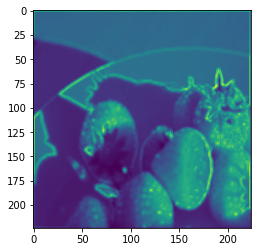

In [31]:
plt.imshow(conv_img_mean)

### Visualize the activations of the block5_conv 2 layer


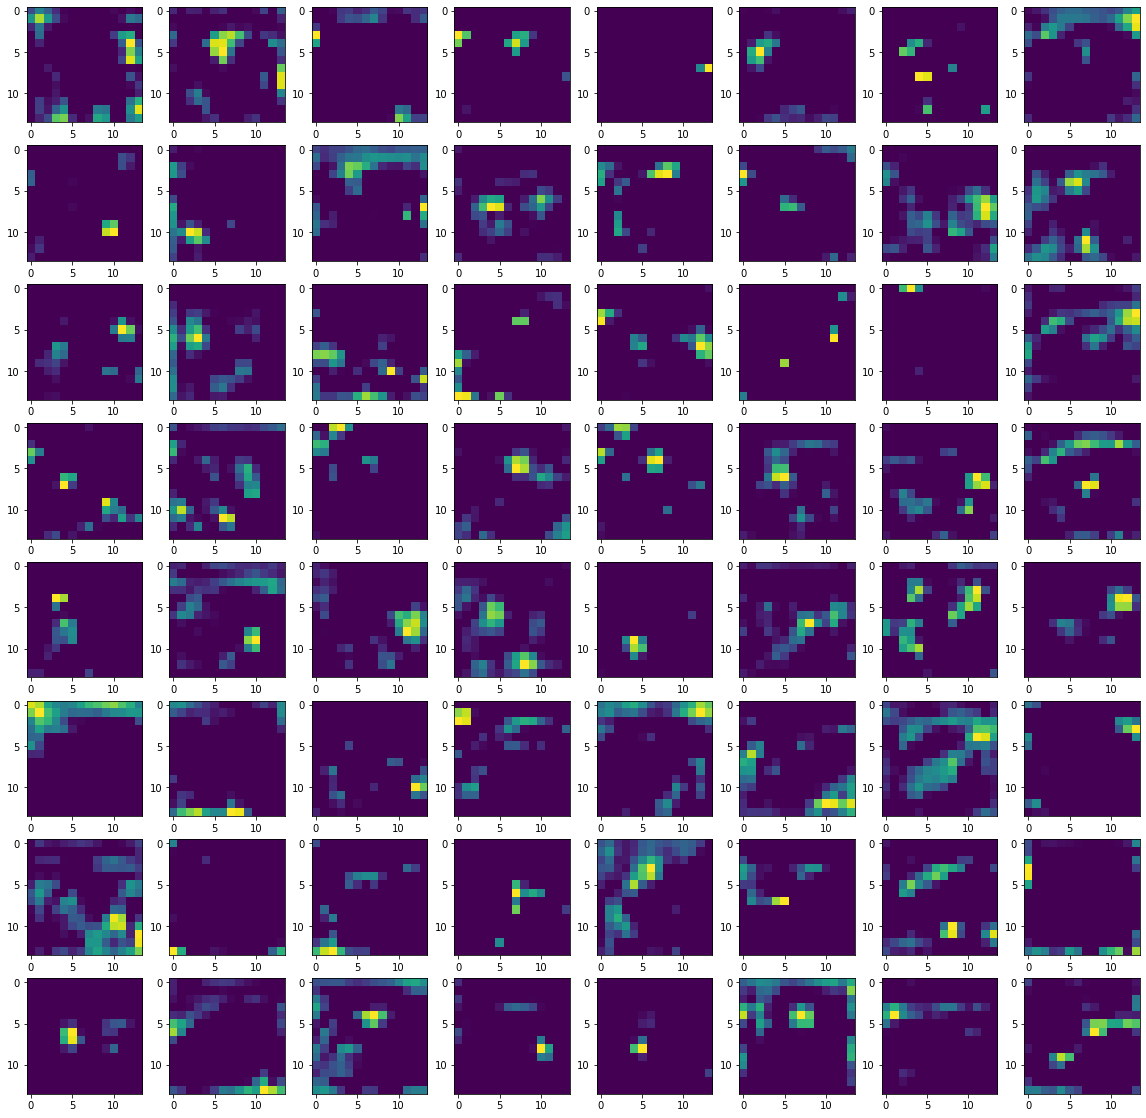

In [32]:
layer_name = 'block5_conv2'
layer = layer_dict[layer_name]
activations = get_activations(vgg16, layer, input_img_data)
activated_img = activations[0][0]  
n = 8
fig = plt.figure(figsize=(20, 20))
for i in range(n):
    for j in range(n):
        idx = (n*i)+j
        ax = fig.add_subplot(n, n, idx+1)
        ax.imshow(activated_img[:,:,idx])